In [61]:
from importlib import reload
try:
    core = reload(core)
except:
    import core
from core import *
ROOT_DIR = "./data/"

In [62]:
qos_re_class_range = [True,False]
seed_range = [ (i + 1) for i in range(9)]
res_alloc_type_range = [ResourceAllocatorType.NOMA_APR]
req_rsu_range = [True]
traffic_scale_range = [ 1.4 ]
dyn_sg_behav_range = [DynamicSocialGroupBehaviour.MAX_N_GROUPS]
dyn_sg_conf_range = [(i*2)+5 for i in range(5)]

In [63]:
os.getcwd()

'/home/OD/repos/ProjectSumo'

In [64]:
interest_config = InterestConfig(
    None,
    None,
    False,
    ResourceAllocatorType.NOMA_OPT,
    False,
    0,
    0
)
stats = {
    dyn_sg_behav: {
        dyn_sg_conf: {
            qos_re_class:
            {
                seed: {
                    res_alloc_type: {
                        req_rsu: {
                            traffic_scale: None
                            for traffic_scale in traffic_scale_range
                        }
                        for req_rsu in req_rsu_range
                    }
                    for res_alloc_type in res_alloc_type_range
                }
                for seed in seed_range
            }
            for qos_re_class in qos_re_class_range
        }
        for dyn_sg_conf in dyn_sg_conf_range
    }
    for dyn_sg_behav in dyn_sg_behav_range

}
for dyn_sg_behav in dyn_sg_behav_range:
    for dyn_sg_conf in dyn_sg_conf_range:
        for qos_re_class in qos_re_class_range:
            for seed in seed_range:
                for res_alloc_type in res_alloc_type_range:
                    for req_rsu in req_rsu_range:
                        for traffic_scale in traffic_scale_range:
                            interest_config.dyn_sg_behav = dyn_sg_behav
                            interest_config.dyn_sg_conf = dyn_sg_conf
                            interest_config.qos_re_class = qos_re_class
                            interest_config.res_alloc_type = res_alloc_type
                            interest_config.req_rsu = req_rsu
                            interest_config.traffic_scale = traffic_scale
                            interest_config.rng_seed = seed
                            try:
                                print(ROOT_DIR + interest_config.folder())
                                with open(ROOT_DIR + interest_config.folder() + "report.pickle", "rb") as file:
                                    # with open("data/yQoS/{}/{}/report_adjust_wait_time_nQoS.pickle".format(seed,str(interest_config)), "rb") as file:
                                    stats[dyn_sg_behav][dyn_sg_conf][qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale] = pickle.load(
                                        file)
                            except Exception as e:
                                print("missing: {}. => {}".format(str(interest_config),e))


./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S1/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S2/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S3/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S4/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S5/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S6/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S7/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S8/
./data/MAX_N_GROUPS(5)/yQoS/yRSU/NOMA_APR/D1.4/S9/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S1/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S2/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S3/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S4/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S5/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S6/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S7/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S8/
./data/MAX_N_GROUPS(5)/nQoS/yRSU/NOMA_APR/D1.4/S9/
./data/MAX_N_GROUPS(7)/yQoS/yRSU/NOMA_APR/D1.4/S1/
./data/MAX_N_GROUPS(7)/yQoS/yRS

In [65]:
graphs={}

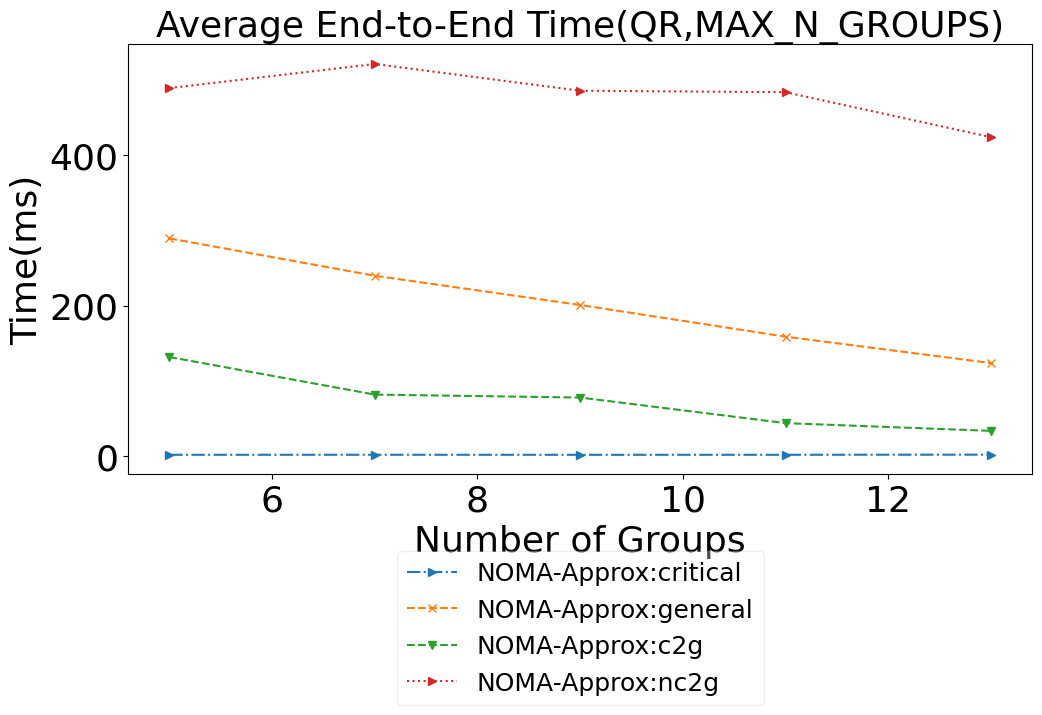

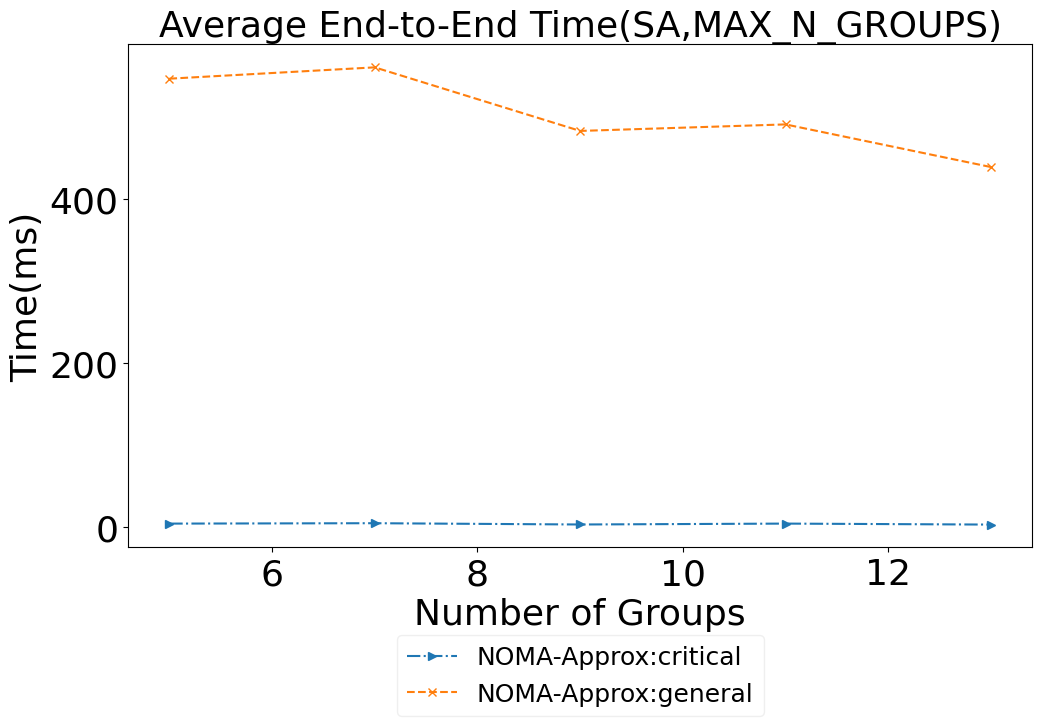

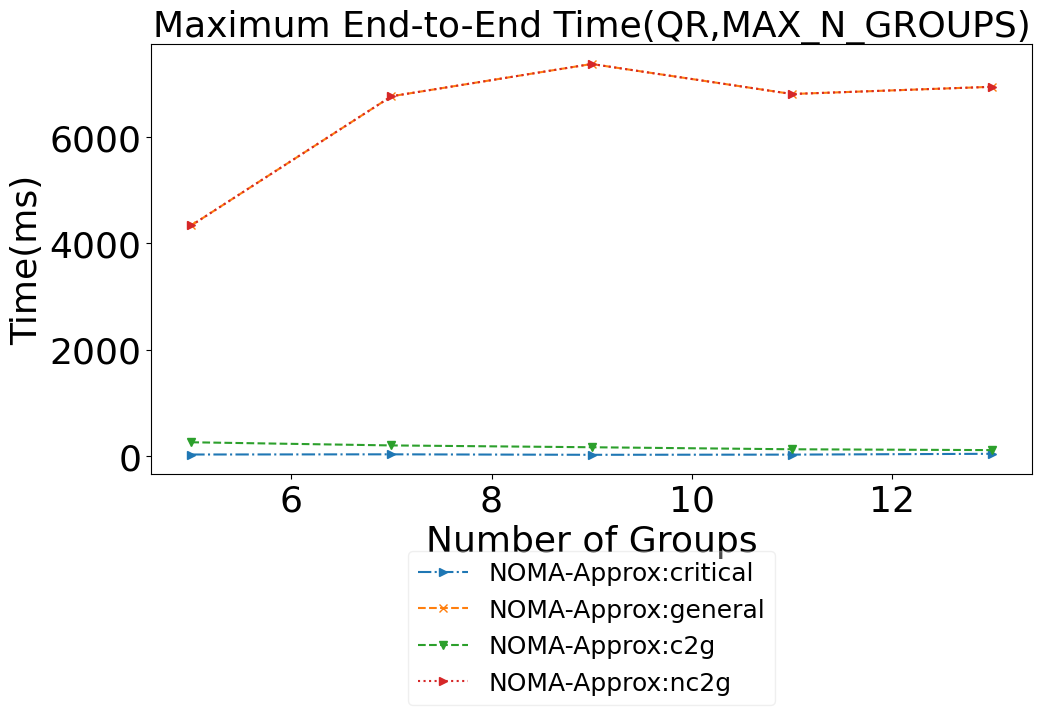

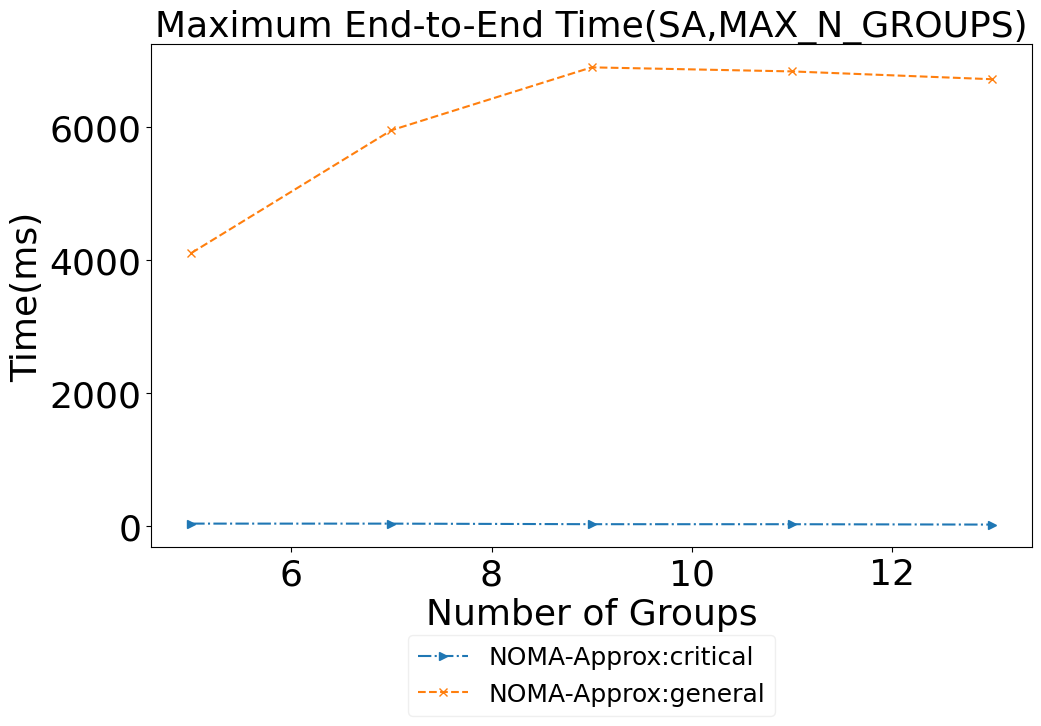

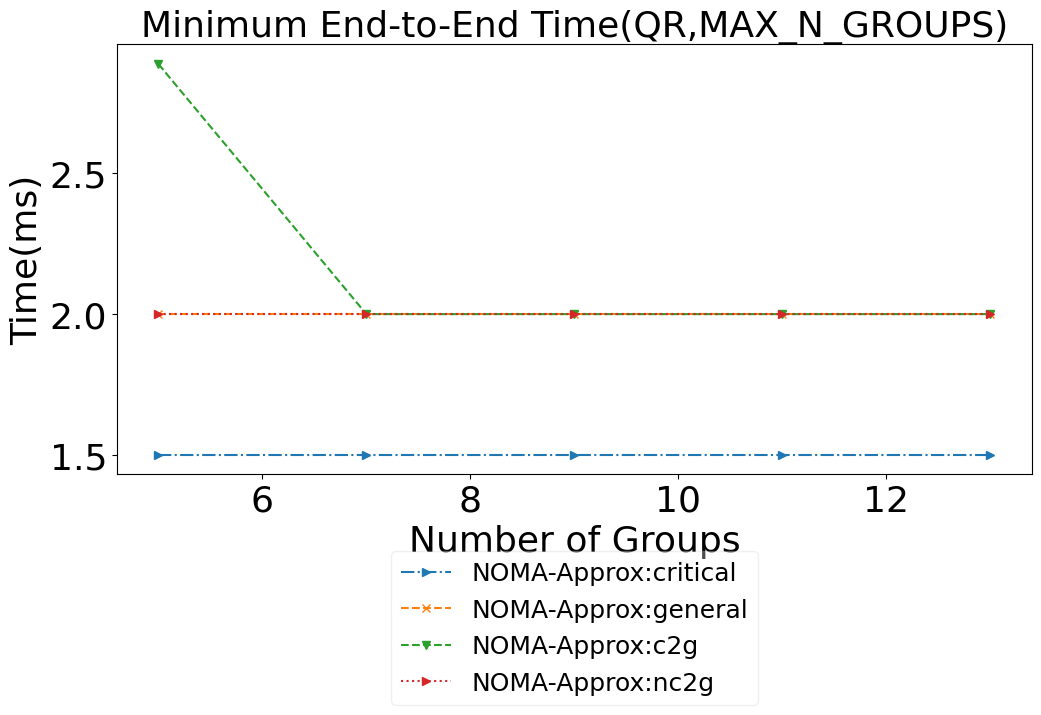

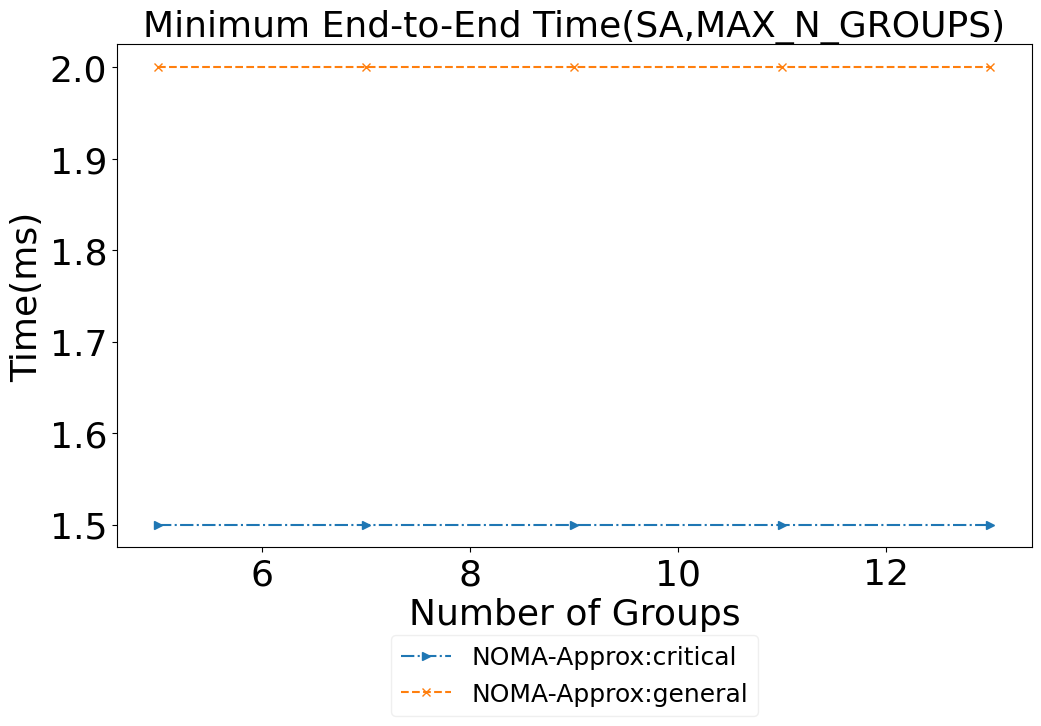

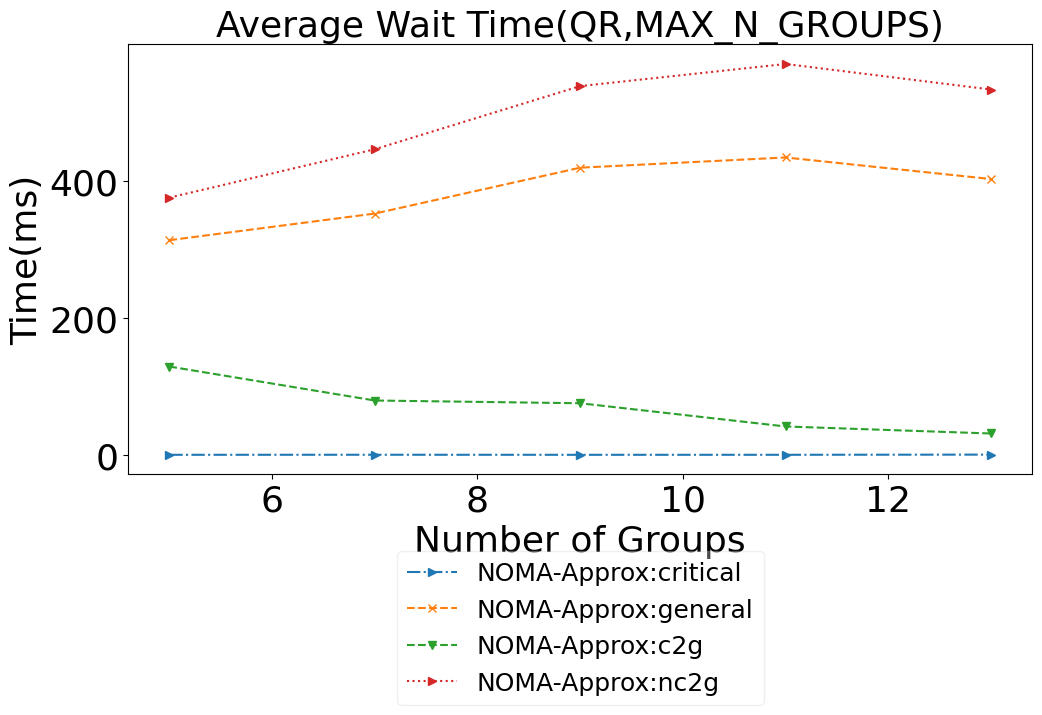

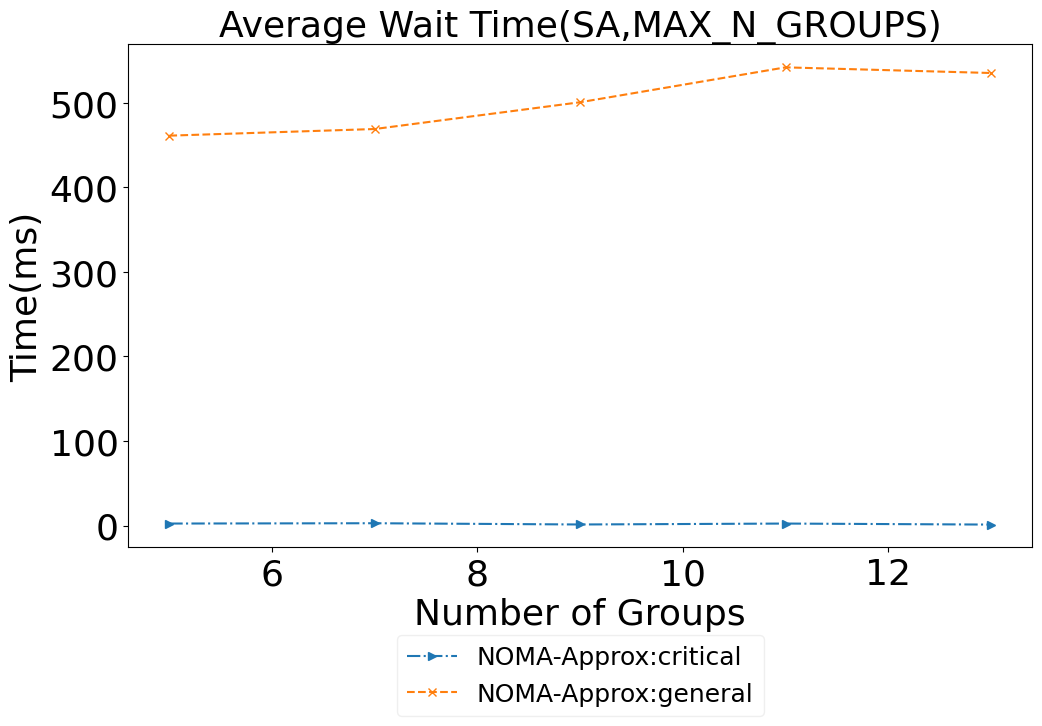

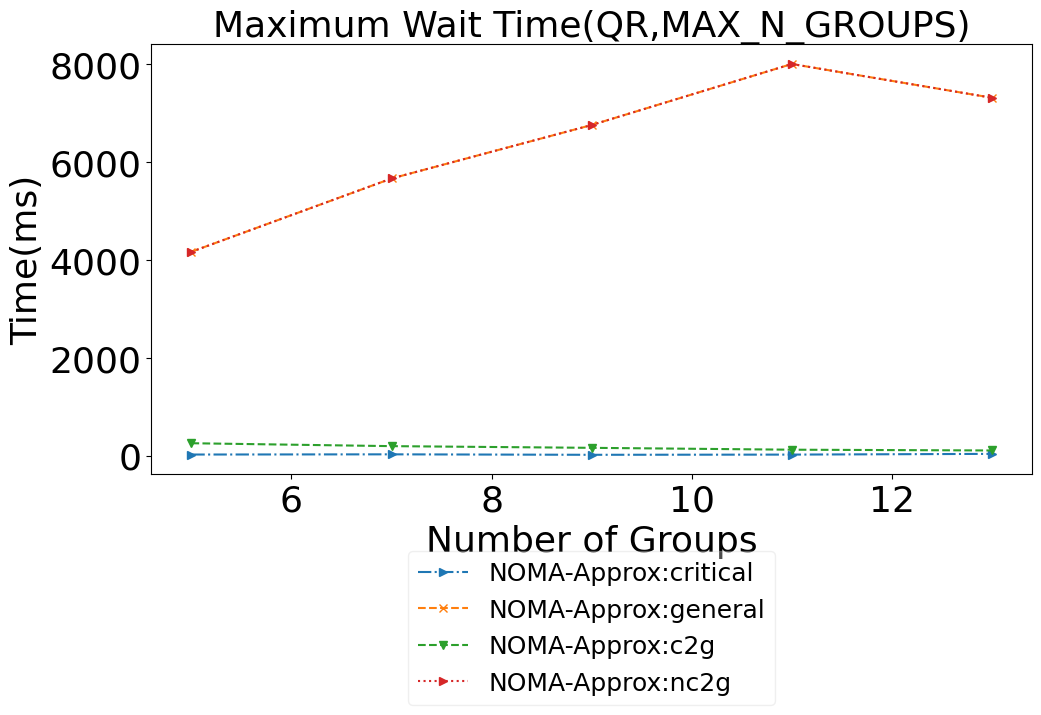

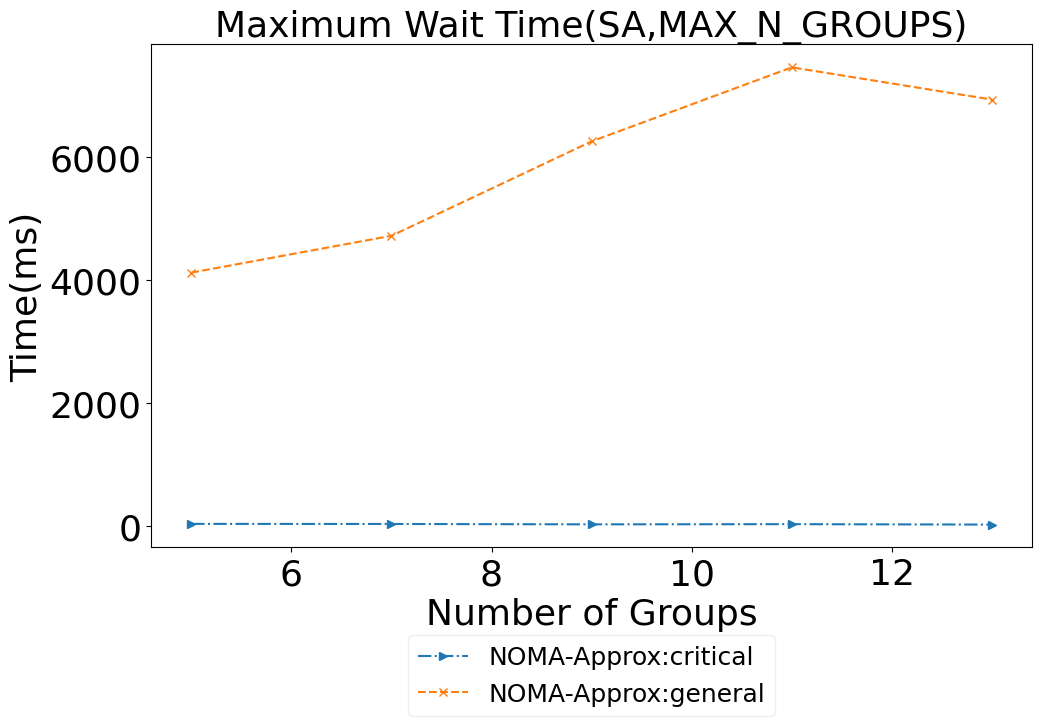

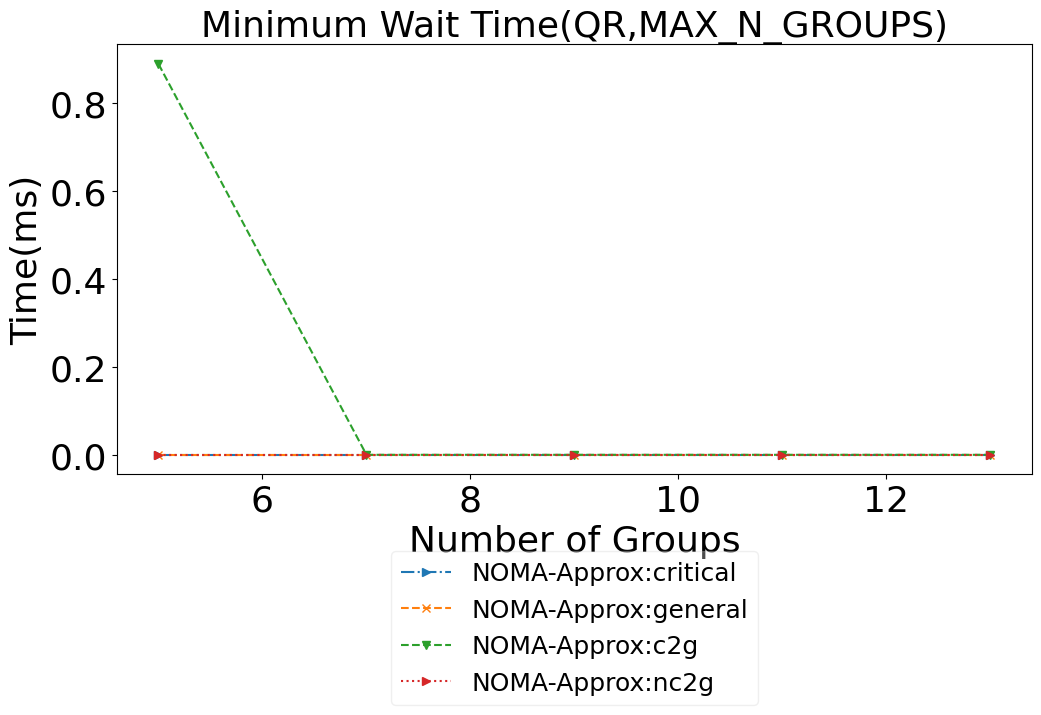

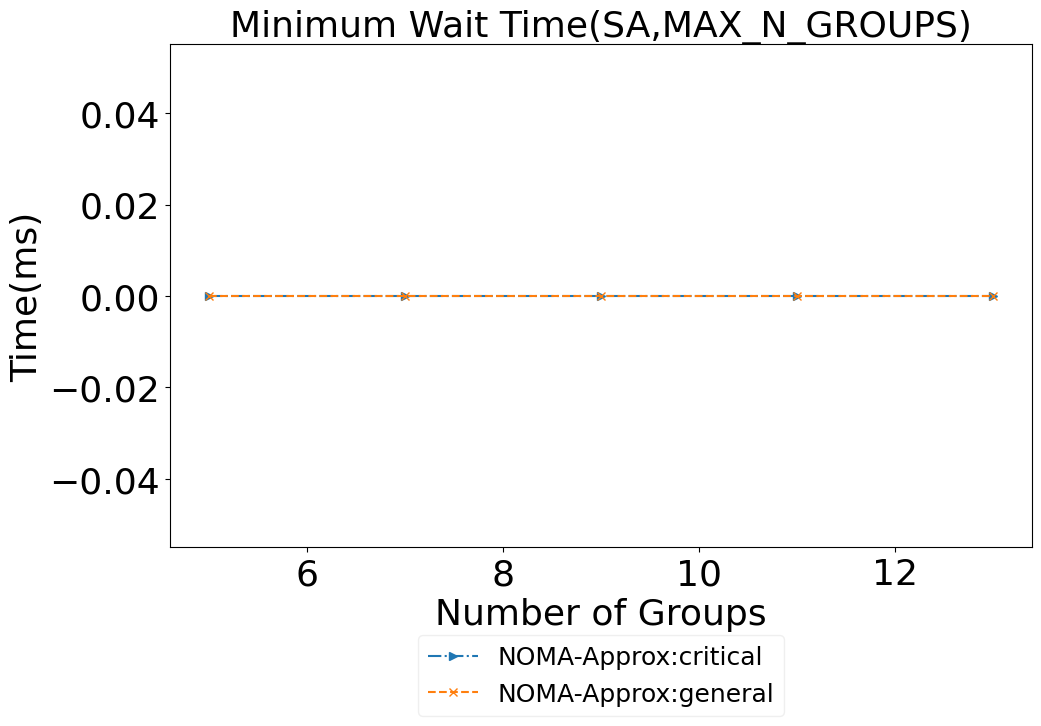

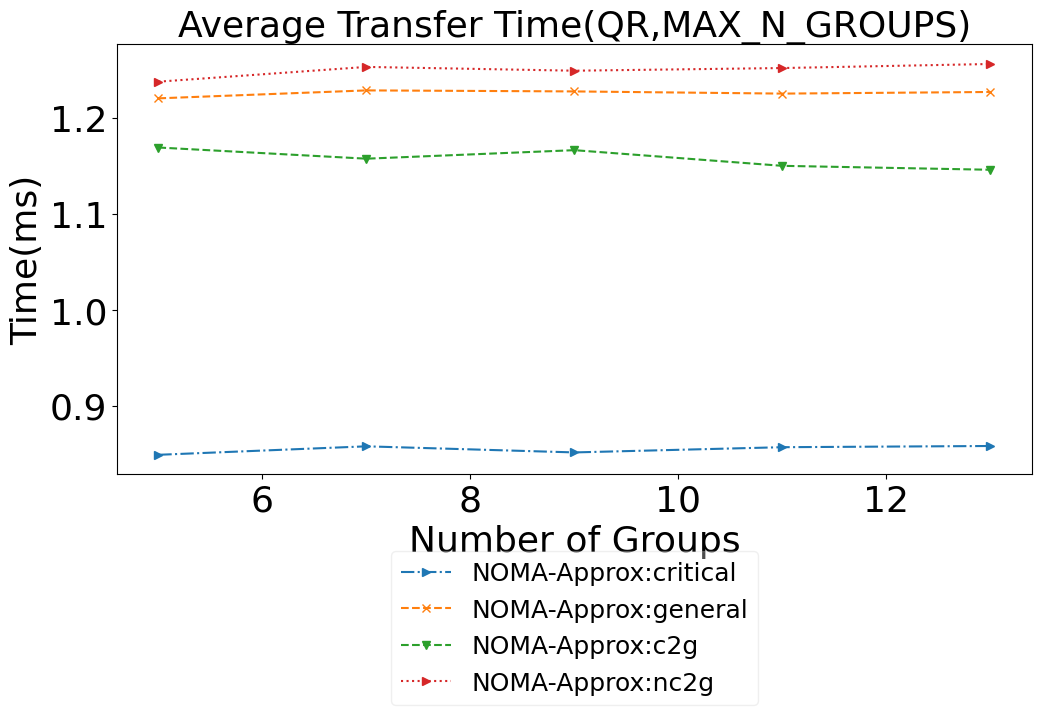

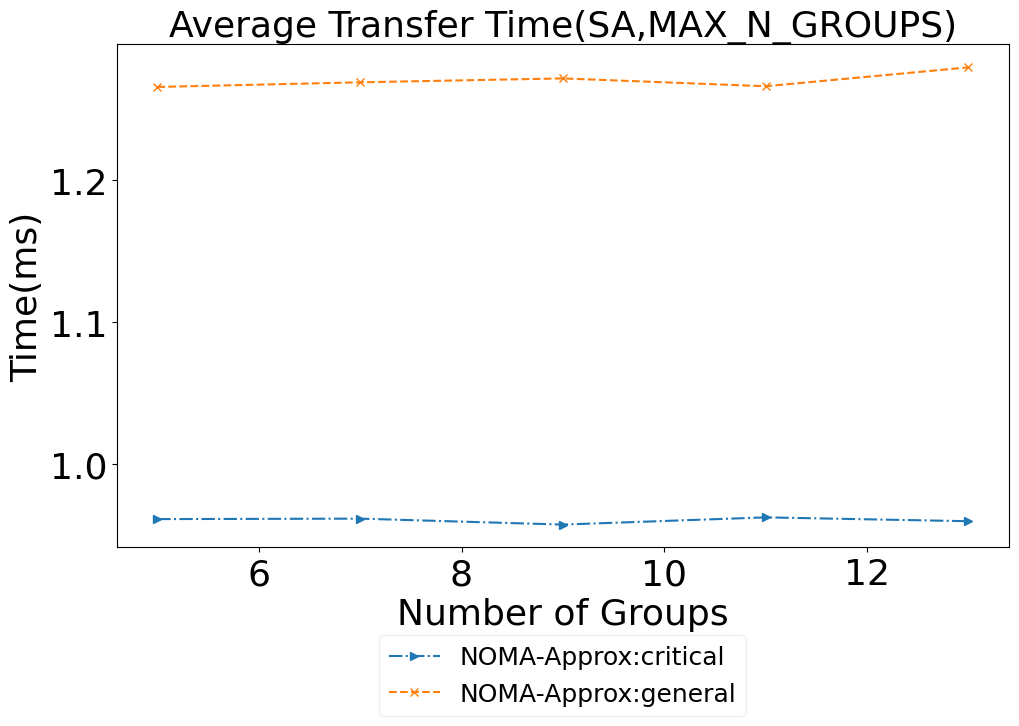

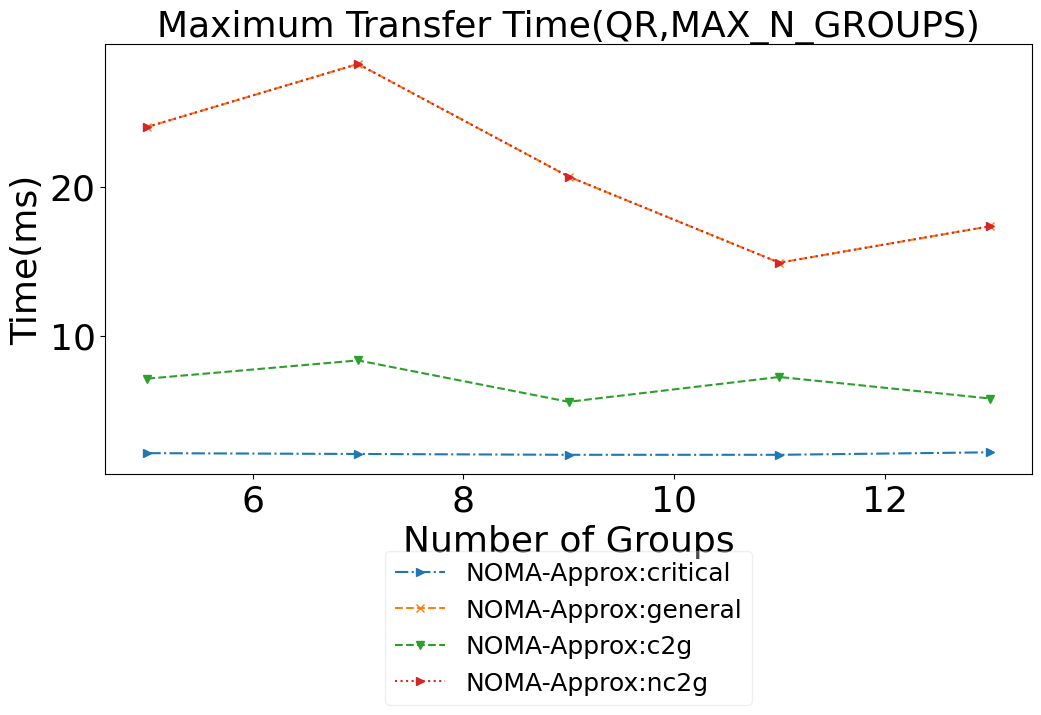

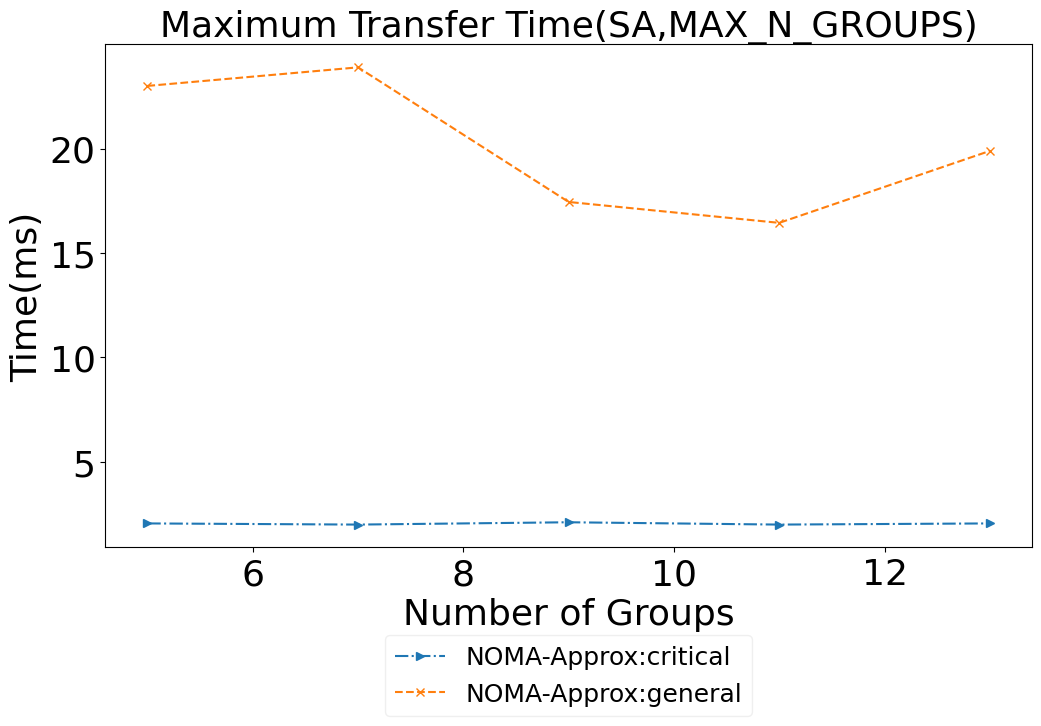

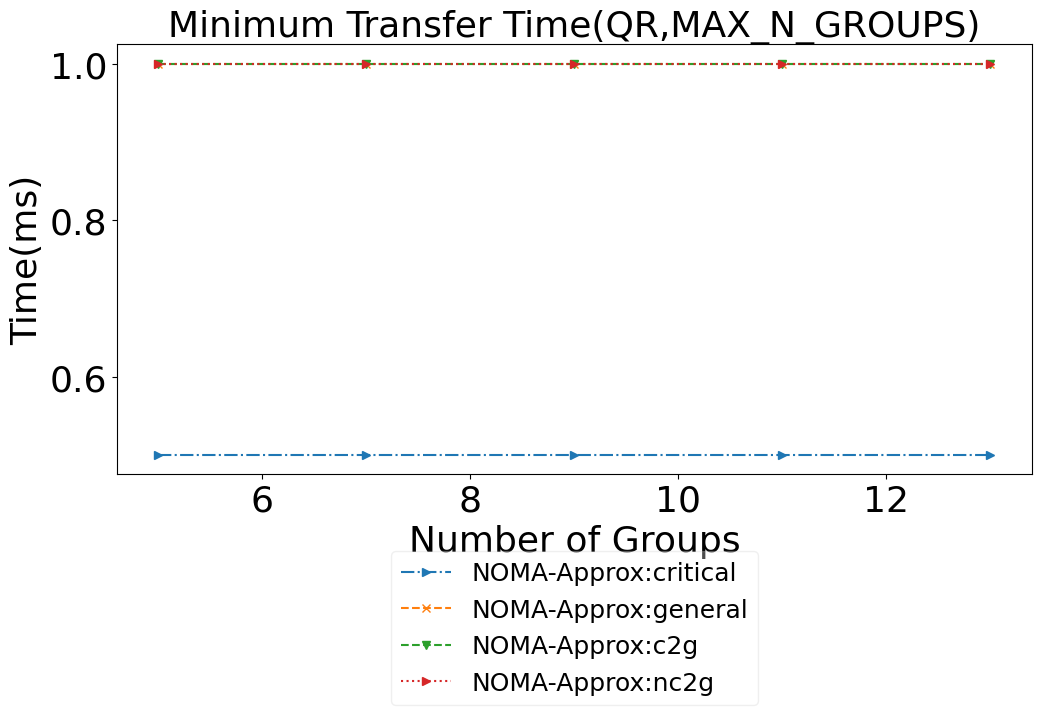

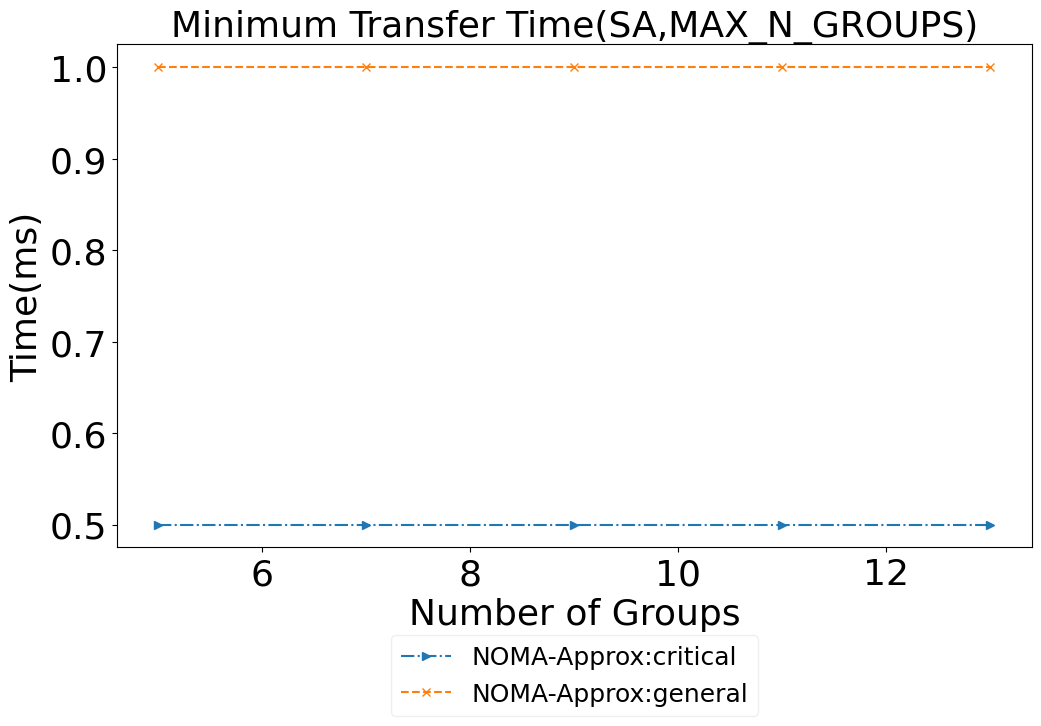

In [66]:
graphs= {}
configs = [
    {
        "catalog": "end-to-end",
        "topic": "End-to-End Time",
        "x": "Number of Groups",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "wait-time",
        "topic": "Wait Time",
        "x": "Number of Groups",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
    {
        "catalog": "tx-time",
        "topic": "Transfer Time",
        "x": "Number of Groups",
        "y": "Time(ms)",
        "subject": ["avg", "max", "min"]
    },
]


# intialize
for config in configs:
    catalog = config["catalog"]
    topic = config["topic"]
    subjects = config["subject"]
    for subject in subjects:
        for req_rsu in req_rsu_range:
            for qos_re_class in ScenarioQoSReClassRange(req_rsu):
                for dyn_sg_behav in dyn_sg_behav_range:
                    title = "{} {}({},{})".format(
                            ExtractAbbreviations(subject),
                            topic,
                            ScenarioPrefix(req_rsu,qos_re_class),
                            dyn_sg_behav.name
                        )
                    if(title not in graphs):
                        graphs[title] = Graph(title, config["x"], config["y"],ncols=len(res_alloc_type_range))
                    graph = graphs[title]
                    for res_alloc_type in res_alloc_type_range:    
                        for nft in ScenarioNetFlowType(qos_re_class):
                            y = []
                            x = dyn_sg_conf_range
                            for dyn_sg_conf in dyn_sg_conf_range:
                                value = []
                                for seed in seed_range:
                                    v = stats[dyn_sg_behav][dyn_sg_conf][qos_re_class][seed][res_alloc_type][req_rsu][traffic_scale][catalog][nft.name][subject]
                                    if v == PINF or v == NINF:
                                        v = 0
                                    value.append(v*1000)
                                y.append(sum(value) / len(value))
                            graph.addLine(
                                Line("{}:{}".format(ScenarioAllocName(res_alloc_type), nft.name.lower()), x, y)
                            )

ShowGraphs(graphs,False)